In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns',50)
#import featuretools as ft
import seaborn as sns

In [2]:
#reading the datasets
train=pd.read_csv("Train.csv")
test=pd.read_csv('Test.csv')

In [3]:
split=train.shape[0]
datasets=pd.concat([train,test],axis=0)

In [4]:
datasets.tail(2)

,age_of_respondent,bank_account,cellphone_access,country,education_level,gender_of_respondent,household_size,job_type,location_type,marital_status,relationship_with_head,uniqueid,year
10084,28,NaN,Yes,Uganda,Primary education,Female,6,Self employed,Rural,Married/Living together,Spouse,uniqueid_3001,2018
10085,16,NaN,Yes,Uganda,Secondary education,Male,7,Other Income,Urban,Single/Never Married,Other relative,uniqueid_3002,2018


In [5]:
datasets.drop(['uniqueid'],inplace=True,axis=1)

# Working On numerical data

In [6]:
#age
print("Maximum Age",datasets['age_of_respondent'].max())
print("Minimun Age",datasets['age_of_respondent'].min())
print("Missing values",datasets['age_of_respondent'].isnull().any())

Maximum Age 100
Minimun Age 16
Missing values False


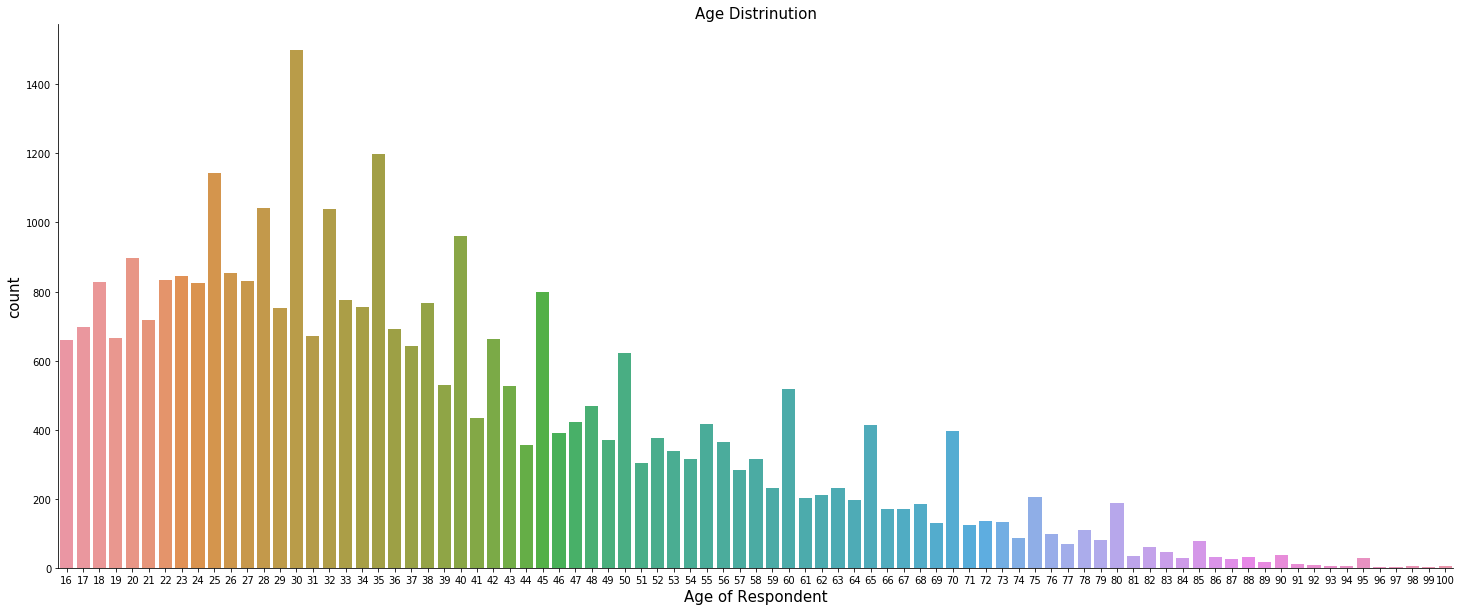

In [7]:
#Visualizing Age
fig,ax=plt.subplots()
fig.set_size_inches(25,10)
sns.countplot(x='age_of_respondent',data=datasets)
ax.set_xlabel('Age of Respondent',fontsize=15)
ax.set_ylabel('count',fontsize=15)
ax.set_title("Age Distrinution",fontsize=15)
sns.despine()

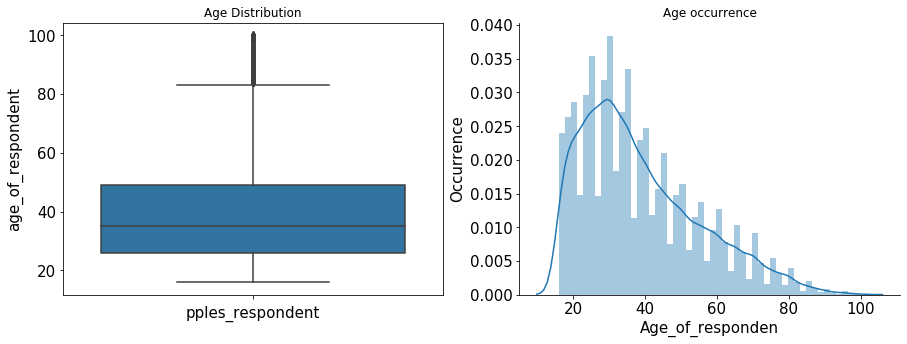

In [8]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.boxplot(x='age_of_respondent',data=datasets,orient='v',ax=ax1)
ax1.set_xlabel('pple''s_respondent',fontsize=15)
ax1.set_ylabel('age_of_respondent',fontsize=15)
ax1.set_title('Age Distribution')
ax1.tick_params(labelsize=15)

sns.distplot(datasets['age_of_respondent'],ax=ax2)
ax2.set_xlabel('Age_of_responden',fontsize=15)
ax2.set_ylabel('Occurrence',fontsize=15)
ax2.set_title("Age occurrence")
sns.despine(ax=ax2)
ax2.tick_params(labelsize=15)


In [9]:
#Calculating quartiles
print('1st quartile',datasets['age_of_respondent'].quantile(q=0.25))
print('2nd quartile',datasets['age_of_respondent'].quantile(q=0.5))
print('3rd quartile',datasets['age_of_respondent'].quantile(q=0.75))
print('4th quartile',datasets['age_of_respondent'].quantile(q=1))

1st quartile 26.0
2nd quartile 35.0
3rd quartile 49.0
4th quartile 100.0


In [10]:
#checking for possibility of outliers in age
'''
InterquartileRange,IQR=Q3-Q1
lower 1.5*IQR whisker=Q1-1.5*IQR
upper 1.5*IQR whisker=Q3+1.5*IQR
'''
print('Ages Above',datasets['age_of_respondent'].quantile(q=0.75)+1.5*(datasets['age_of_respondent'].quantile(q=0.75)-datasets['age_of_respondent'].quantile(q=0.25)),'are outliers')

Ages Above 83.5 are outliers


In [11]:
#print number of outliers
print('number of outliers',datasets[datasets['age_of_respondent']>83.5]['age_of_respondent'].count())
print('% outliers',datasets[datasets['age_of_respondent']>83.5]['age_of_respondent'].count()/len(datasets)*100,'%')

number of outliers 327
% outliers 0.9729247247842904 %


In [12]:
#trying to use values to calculate this variable
print("Mean:",datasets['age_of_respondent'].mean())
#1.Lower std means datapoints tend to be close to the mean
#2.higher std means datapoints are scattered
print("Std:",datasets['age_of_respondent'].std())
#i'm using coefficient Variation to give precise insight;std/mean*100
#cv<15......lower dispersion
#cv>30%..highr dispersion
print("CV",datasets['age_of_respondent'].std()/datasets['age_of_respondent'].mean()*100)

Mean: 38.656114251710804
Std: 16.447127405613852
CV 42.547285789041645


## 2.Household size

In [13]:

print("Maximum Age",datasets['household_size'].max())
print("Minimun Age",datasets['household_size'].min())
print("Missing values",datasets['household_size'].isnull().any())

Maximum Age 21
Minimun Age 0
Missing values False


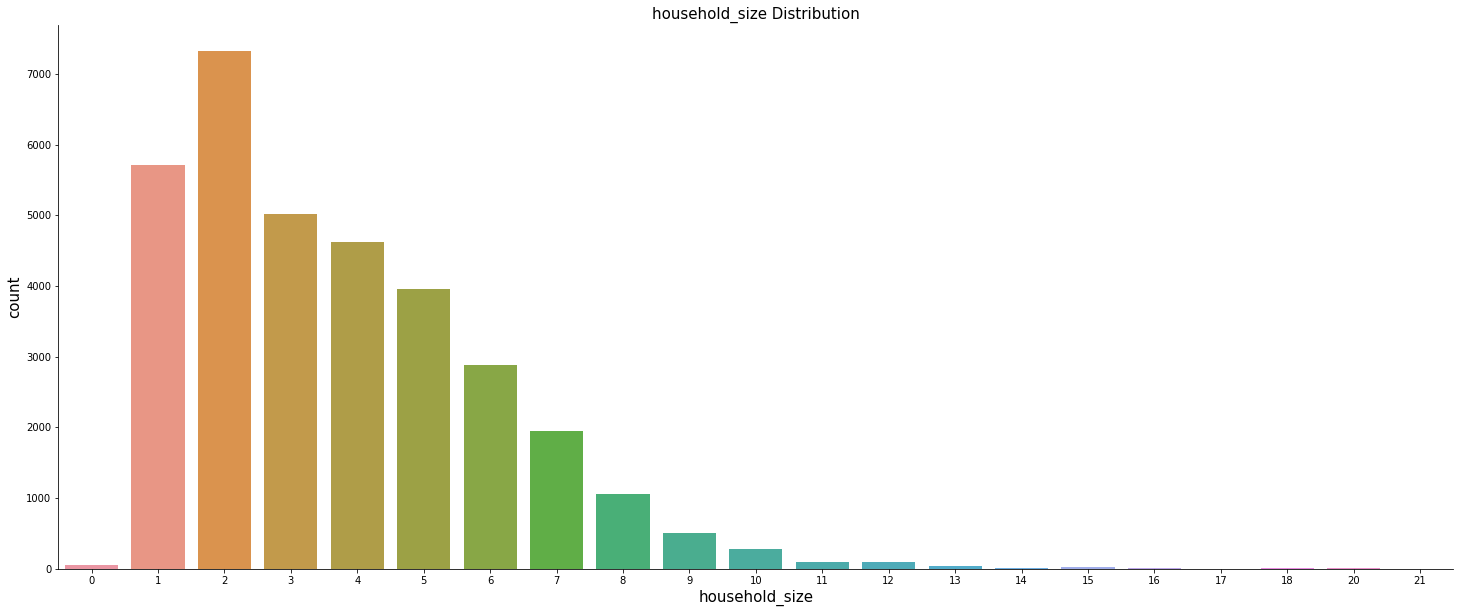

In [14]:
#Visualizing Age
fig,ax=plt.subplots()
fig.set_size_inches(25,10)
sns.countplot(x='household_size',data=datasets)
ax.set_xlabel('household_size',fontsize=15)
ax.set_ylabel('count',fontsize=15)
ax.set_title("household_size Distribution",fontsize=15)
sns.despine()

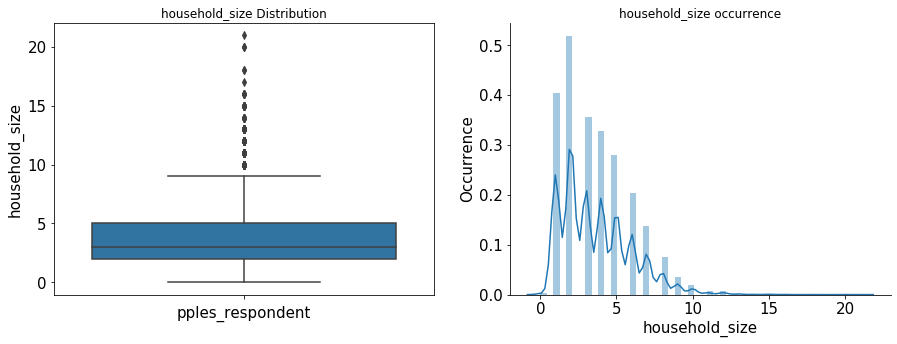

In [15]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.boxplot(x='household_size',data=datasets,orient='v',ax=ax1)
ax1.set_xlabel('pple''s_respondent',fontsize=15)
ax1.set_ylabel('household_size',fontsize=15)
ax1.set_title('household_size Distribution')
ax1.tick_params(labelsize=15)

sns.distplot(datasets['household_size'],ax=ax2)
ax2.set_xlabel('household_size',fontsize=15)
ax2.set_ylabel('Occurrence',fontsize=15)
ax2.set_title("household_size occurrence")
sns.despine(ax=ax2)
ax2.tick_params(labelsize=15)


## Categorical variables

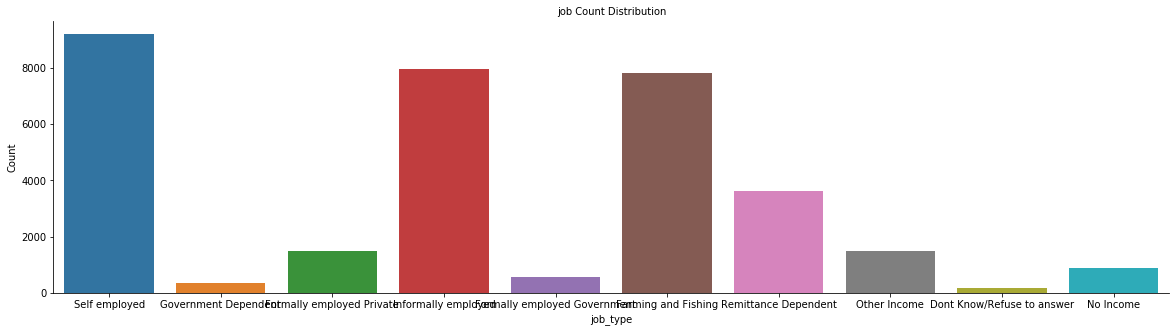

In [16]:
#1.job_type
# What kind of jobs clients this bank have, if you cross jobs with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'job_type', data = datasets)
ax.set_xlabel('job_type', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('job Count Distribution', fontsize=10)
ax.tick_params(labelsize=10)
sns.despine()

### 2.Marital Status

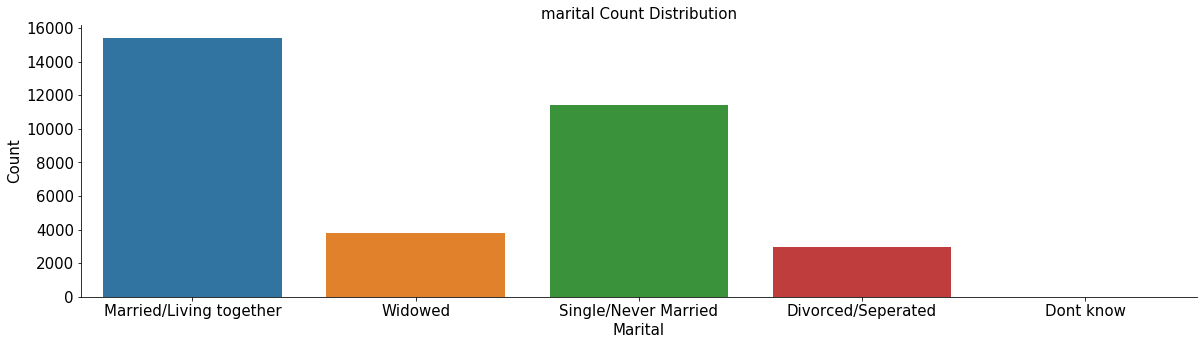

In [17]:
# What kind of 'marital clients' this bank have, if you cross marital with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'marital_status', data = datasets)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('marital Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### 3.Education Level

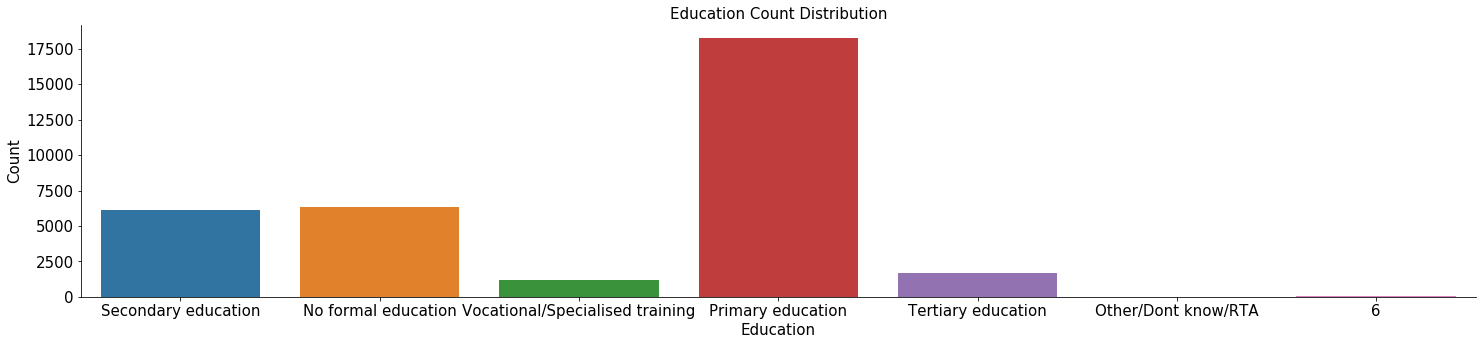

In [18]:
# What kind of 'education clients this bank have, if you cross education with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(25, 5)
sns.countplot(x = 'education_level', data = datasets)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### 4.Country

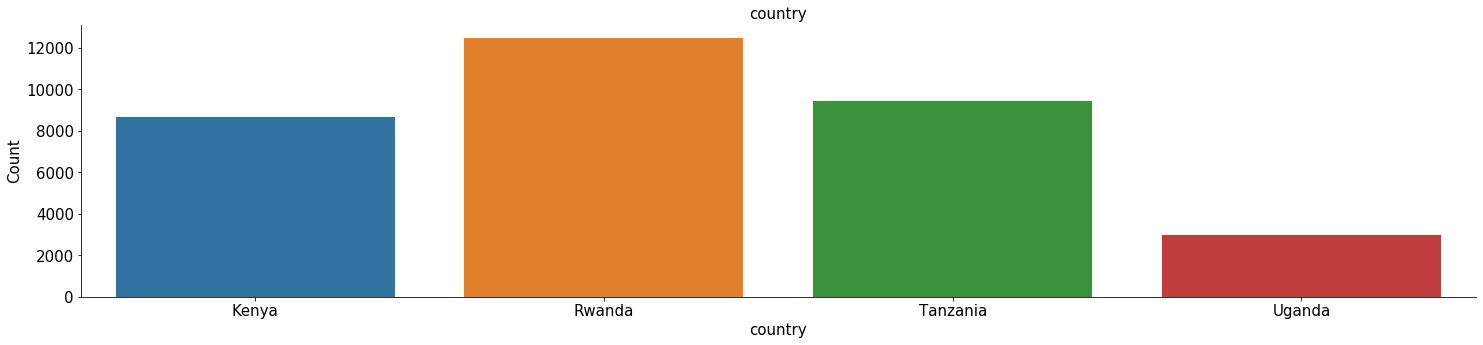

In [19]:
# What kind of 'education clients this bank have, if you cross education with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(25, 5)
sns.countplot(x = 'country', data = datasets)
ax.set_xlabel('country', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('country', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### 5.location


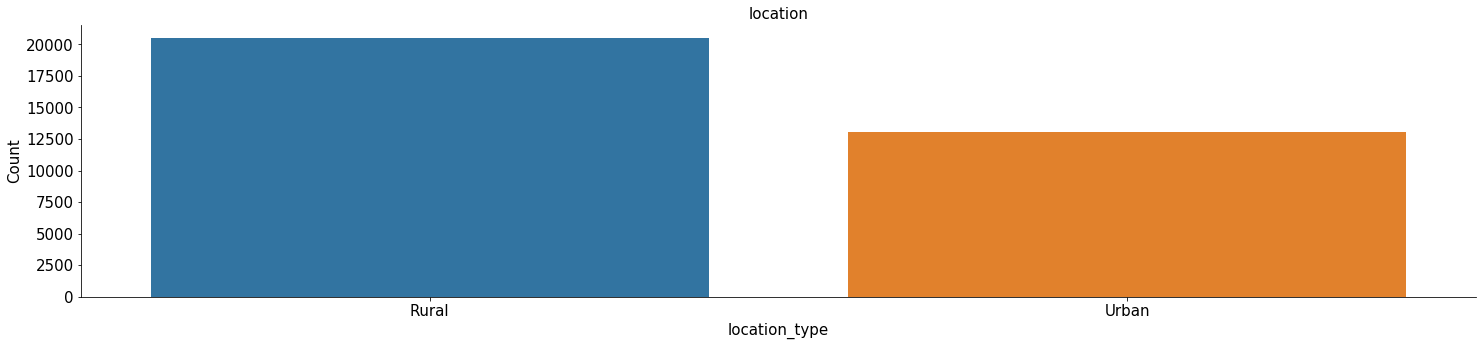

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 5)
sns.countplot(x = 'location_type', data = datasets)
ax.set_xlabel('location_type', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('location', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### 6.Cellophone access

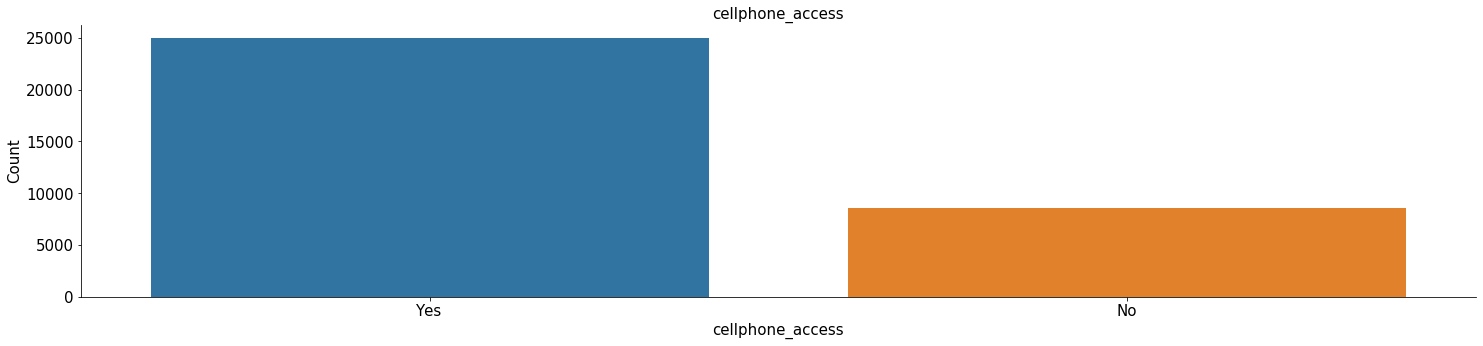

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 5)
sns.countplot(x = 'cellphone_access', data = datasets)
ax.set_xlabel('cellphone_access', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('cellphone_access', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

# 7.Gender

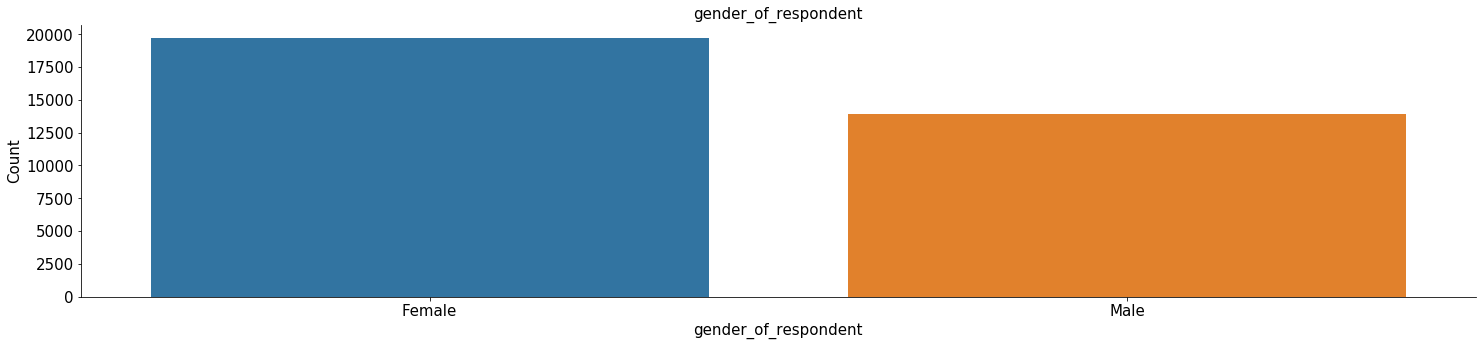

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 5)
sns.countplot(x = 'gender_of_respondent', data = datasets)
ax.set_xlabel('gender_of_respondent', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('gender_of_respondent', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

# Feature Engineering

In [23]:
i_cols=['age_of_respondent','household_size','year']

In [24]:
#Freq encoding
for col in i_cols:
    
    fq_encode = datasets[col].value_counts().to_dict()   
    datasets[col+'_fq_enc'] = datasets[col].map(fq_encode)
    #mergedStuff[col+'_sum'] = mergedStuff[col].sum(fq_encode)

In [25]:

datasets["age_div_hs"]=datasets.age_of_respondent/datasets.household_size
datasets["age_sub_hs"]=datasets.age_of_respondent-datasets.household_size
datasets["log10_age"]=datasets.age_of_respondent/10
datasets["log100_age"]=datasets.age_of_respondent/100
datasets["agevsdiv_hs"]=datasets.age_of_respondent-datasets.age_div_hs
datasets["agevssub_hs"]=datasets.age_of_respondent-datasets.age_sub_hs
datasets["log10vslog100"]=datasets.log10_age-datasets.log100_age
datasets["Agelog"]=datasets.agevsdiv_hs-datasets.log10vslog100

datasets["log10_household"]=datasets.log10_age-datasets.household_size
datasets["agelog10"]=datasets.age_of_respondent-datasets.log10_age

datasets["year_log10"]=datasets.year/10
datasets["year_log100"]=datasets.year/100
datasets["year_age"]=datasets.year-datasets.age_of_respondent
datasets["yearage2"]=datasets.year/datasets.age_of_respondent
datasets["yearhousehold"]=datasets.year/datasets.household_size







In [26]:
#datasets.age_of_respondent=pd.cut(datasets.age_of_respondent,[0,13,31,51,100],labels=['ChildAge','YoungAge','MiddleAge','SeniorAge'])

In [27]:
#Dummify the variables
#datasets = pd.get_dummies(datasets, columns=['age_of_respondent'], drop_first=True, prefix=['age_of_respondentr'])

In [28]:
datasets.head()

,age_of_respondent,bank_account,cellphone_access,country,education_level,gender_of_respondent,household_size,job_type,location_type,marital_status,relationship_with_head,year,age_of_respondent_fq_enc,household_size_fq_enc,year_fq_enc,age_div_hs,age_sub_hs,log10_age,log100_age,agevsdiv_hs,agevssub_hs,log10vslog100,Agelog,log10_household,agelog10,year_log10,year_log100,year_age,yearage2,yearhousehold
0,24,Yes,Yes,Kenya,Secondary education,Female,3,Self employed,Rural,Married/Living together,Spouse,2018,826,5015,11671,8.00,21,2.4,0.24,16.00,3,2.16,13.84,-0.6,21.6,201.8,20.18,1994,84.083333,672.666667
1,70,No,No,Kenya,No formal education,Female,5,Government Dependent,Rural,Widowed,Head of Household,2018,396,3963,11671,14.00,65,7.0,0.70,56.00,5,6.30,49.70,2.0,63.0,201.8,20.18,1948,28.828571,403.600000
2,26,Yes,Yes,Kenya,Vocational/Specialised training,Male,5,Self employed,Urban,Single/Never Married,Other relative,2018,854,3963,11671,5.20,21,2.6,0.26,20.80,5,2.34,18.46,-2.4,23.4,201.8,20.18,1992,77.615385,403.600000
3,34,No,Yes,Kenya,Primary education,Female,5,Formally employed Private,Rural,Married/Living together,Head of Household,2018,754,3963,11671,6.80,29,3.4,0.34,27.20,5,3.06,24.14,-1.6,30.6,201.8,20.18,1984,59.352941,403.600000
4,26,No,No,Kenya,Primary education,Male,8,Informally employed,Urban,Single/Never Married,Child,2018,854,1055,11671,3.25,18,2.6,0.26,22.75,8,2.34,20.41,-5.4,23.4,201.8,20.18,1992,77.615385,252.250000


In [29]:
corr=datasets.corr()
corr.style.background_gradient(cmap='coolwarm')

,age_of_respondent,household_size,year,age_of_respondent_fq_enc,household_size_fq_enc,year_fq_enc,age_div_hs,age_sub_hs,log10_age,log100_age,agevsdiv_hs,agevssub_hs,log10vslog100,Agelog,log10_household,agelog10,year_log10,year_log100,year_age,yearage2,yearhousehold
age_of_respondent,1,-0.116568,-0.0252997,-0.717979,0.0906089,0.0237755,0.589117,0.990979,1,1,0.491726,-0.116568,1,0.409056,0.64546,1,-0.0252997,-0.0252997,-0.99868,-0.903362,0.131106
household_size,-0.116568,1,-0.0548616,0.0580147,-0.893979,0.475399,-0.643819,-0.24862,-0.116568,-0.116568,0.564249,1,-0.116568,0.603526,-0.833827,-0.116568,-0.0548616,-0.0548616,0.113443,0.0912901,-0.805354
year,-0.0252997,-0.0548616,1,0.0438091,0.0459261,-0.295334,0.0744712,-0.0172706,-0.0252997,-0.0252997,-0.108866,-0.0548616,-0.0252997,-0.111388,0.0281287,-0.0252997,1,1,0.0766183,0.0400638,0.119296
age_of_respondent_fq_enc,-0.717979,0.0580147,0.0438091,1,-0.0398471,-0.0353052,-0.419345,-0.708037,-0.717979,-0.717979,-0.356301,0.0580147,-0.717979,-0.297163,-0.443679,-0.717979,0.0438091,0.0438091,0.718349,0.524429,-0.076983
household_size_fq_enc,0.0906089,-0.893979,0.0459261,-0.0398471,1,-0.473131,0.468986,0.208998,0.0906089,0.0906089,-0.398797,-0.893979,0.0906089,-0.427975,0.737865,0.0906089,0.0459261,0.0459261,-0.0880116,-0.0723402,0.595783
year_fq_enc,0.0237755,0.475399,-0.295334,-0.0353052,-0.473131,1,-0.327788,-0.0409622,0.0237755,0.0237755,0.382379,0.475399,0.0237755,0.397967,-0.352385,0.0237755,-0.295334,-0.295334,-0.0388889,-0.0239253,-0.491748
age_div_hs,0.589117,-0.643819,0.0744712,-0.419345,0.468986,-0.327788,1,0.661595,0.589117,0.589117,-0.413923,-0.643819,0.589117,-0.496369,0.823098,0.589117,0.0744712,0.0744712,-0.583728,-0.491387,0.813986
age_sub_hs,0.990979,-0.24862,-0.0172706,-0.708037,0.208998,-0.0409622,0.661595,1,0.990979,0.990979,0.403439,-0.24862,0.990979,0.317496,0.741999,0.990979,-0.0172706,-0.0172706,-0.98927,-0.893322,0.236653
log10_age,1,-0.116568,-0.0252997,-0.717979,0.0906089,0.0237755,0.589117,0.990979,1,1,0.491726,-0.116568,1,0.409056,0.64546,1,-0.0252997,-0.0252997,-0.99868,-0.903362,0.131106
log100_age,1,-0.116568,-0.0252997,-0.717979,0.0906089,0.0237755,0.589117,0.990979,1,1,0.491726,-0.116568,1,0.409056,0.64546,1,-0.0252997,-0.0252997,-0.99868,-0.903362,0.131106


In [30]:
datasets.shape

(33610, 30)

In [31]:
#ft.primitives.list_primitives()

In [32]:

datasets1=pd.get_dummies(datasets['country'], drop_first=True)
datasets2=pd.get_dummies(datasets['year'], drop_first=True)
datasets3=pd.get_dummies(datasets['location_type'], drop_first=True)
datasets4=pd.get_dummies(datasets['cellphone_access'], drop_first=True)
datasets5=pd.get_dummies(datasets['gender_of_respondent'], drop_first=True)
datasets6=pd.get_dummies(datasets['relationship_with_head'], drop_first=True)
datasets7=pd.get_dummies(datasets['marital_status'], drop_first=True)
datasets8=pd.get_dummies(datasets['education_level'], drop_first=True)
datasets9=pd.get_dummies(datasets['job_type'], drop_first=True)




datasets=datasets.drop(['country'], axis=1)
datasets=datasets.drop(['year'], axis=1)
datasets=datasets.drop(['location_type'], axis=1)
datasets=datasets.drop(['cellphone_access'], axis=1)
datasets=datasets.drop(['gender_of_respondent'], axis=1)
datasets=datasets.drop(['relationship_with_head'], axis=1)
datasets=datasets.drop(['marital_status'], axis=1)
datasets=datasets.drop(['education_level'], axis=1)
datasets=datasets.drop(['job_type'], axis=1)


In [33]:
#now we combine all datasets together
datasets=pd.concat([datasets,datasets1,datasets2,datasets3,datasets4,datasets5,datasets6,datasets7,datasets8,datasets9], axis=1)


In [34]:
datasets["bank_account"] = pd.get_dummies(datasets['bank_account'], columns = ['bank_account'], prefix = ['bank_account'], drop_first = True)

In [35]:
datasets.head()

,age_of_respondent,bank_account,household_size,age_of_respondent_fq_enc,household_size_fq_enc,year_fq_enc,age_div_hs,age_sub_hs,log10_age,log100_age,agevsdiv_hs,agevssub_hs,log10vslog100,Agelog,log10_household,agelog10,year_log10,year_log100,year_age,yearage2,yearhousehold,Rwanda,Tanzania,Uganda,2017,...,Male,Head of Household,Other non-relatives,Other relative,Parent,Spouse,Dont know,Married/Living together,Single/Never Married,Widowed,No formal education,Other/Dont know/RTA,Primary education,Secondary education,Tertiary education,Vocational/Specialised training,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed
0,24,1,3,826,5015,11671,8.00,21,2.4,0.24,16.00,3,2.16,13.84,-0.6,21.6,201.8,20.18,1994,84.083333,672.666667,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,70,0,5,396,3963,11671,14.00,65,7.0,0.70,56.00,5,6.30,49.70,2.0,63.0,201.8,20.18,1948,28.828571,403.600000,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,26,1,5,854,3963,11671,5.20,21,2.6,0.26,20.80,5,2.34,18.46,-2.4,23.4,201.8,20.18,1992,77.615385,403.600000,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,34,0,5,754,3963,11671,6.80,29,3.4,0.34,27.20,5,3.06,24.14,-1.6,30.6,201.8,20.18,1984,59.352941,403.600000,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,26,0,8,854,1055,11671,3.25,18,2.6,0.26,22.75,8,2.34,20.41,-5.4,23.4,201.8,20.18,1992,77.615385,252.250000,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [36]:
train=datasets[:split]
test=datasets[split:]

In [37]:
test.drop(['bank_account'],axis=1,inplace=True)

In [38]:
test.shape

(10086, 52)

In [39]:

X  = train.drop('bank_account',axis = 1)
y = train['bank_account']

In [40]:
# Splitting the dataset into the Training set and validation set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state =0)



In [41]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators=200)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
#metrics
import sklearn
sklearn.metrics.accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)

0.88788522848034

In [42]:
predictions = classifier.predict(test)

In [43]:
test1=pd.read_csv('Test.csv')
test1['unique_id'] = test1[['uniqueid','country']].apply(lambda x: ' x '.join(x), axis=1)

In [44]:
submission = pd.DataFrame()
submission['unique_id'] = test1['unique_id']
submission['bank_account'] = predictions.reshape((predictions.shape[0]))
submission.to_csv('sub24.csv',index=False)



In [45]:
data2=pd.read_csv("sub24.csv")